<a href="https://colab.research.google.com/github/harlet3000/Myfirst-Repo/blob/main/Copy_of_OpenAI_Whisper_Fed_Meeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenAI Whisper

To get started, we'll first install the OpenAI Whisper Python package using pip.

In [ ]:
!pip install git+https://github.com/openai/whisper.git -q


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 9.0 MB/s eta 0:00:00


We'll also make sure we have a GPU available in Google Colab. If you don't have a GPU, go to Runtime -> Change Runtime Type -> Hardware Accelator and select GPU. I have Colab Pro so I get access to Premium GPU's. Run the command below to show which GPU is being used in the current runtime:

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-cbe1e490-2f3c-56f5-7aa1-d4d7f23ce79a)


Whisper transcribes audio speech to text. To see this in action, we'll need some audio to operate on. We'll extract some audio from a YouTube video using the pytube Python package. let's install it with pip.

In [ ]:
!pip install pytube -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 2.5 MB/s eta 0:00:00


Now that we have installed the dependencies, let's import whisper and the YouTube class from pytube.

In [ ]:
import whisper
from pytube import YouTube

Whisper has a variety of models of varying sizes. The large model will be more accurate but will also be more resource intensive.

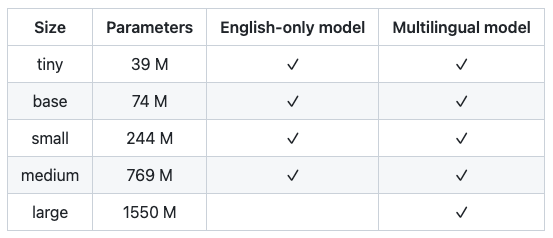

The base model will be sufficient for our needs. Let's load the base model like so:

In [ ]:
model = whisper.load_model('base')

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 124MiB/s]


We'll now instantiate a "YouTube" object by passing in the video URL. This will allow us to retrieve metadata and stream info about the specified YouTube URL.

In [ ]:
youtube_video_url = "https://www.youtube.com/watch?v=asO7TiudjFA"
youtube_video = YouTube(youtube_video_url)

Now that we have an pytube YouTube object, let's explore some of its attributes.

In [ ]:
youtube_video.title


'[LIVE] Pre-Market Prep – Is The Counter Trend Rally Starting?'

In [ ]:
dir(youtube_video)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_age_restricted',
 '_author',
 '_embed_html',
 '_fmt_streams',
 '_initial_data',
 '_js',
 '_js_url',
 '_metadata',
 '_player_config_args',
 '_publish_date',
 '_title',
 '_vid_info',
 '_watch_html',
 'age_restricted',
 'allow_oauth_cache',
 'author',
 'bypass_age_gate',
 'caption_tracks',
 'captions',
 'channel_id',
 'channel_url',
 'check_availability',
 'description',
 'embed_html',
 'embed_url',
 'fmt_streams',
 'from_id',
 'initial_data',
 'js',
 'js_url',
 'keywords',
 'length',
 'metadata',
 'publish_date',
 'rating',
 'register_on_complete_callback',
 'register_on_progress_callback',
 'stream_monostate',
 'streamin

In [ ]:
youtube_video.streams

[<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="8fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="299" mime_type="video/mp4" res="1080p" fps="60fps" vcodec="avc1.64002a" progressive="False" type="video">, <Stream: itag="298" mime_type="video/mp4" res="720p" fps="60fps" vcodec="avc1.640020" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">, <Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="au

As you can see, we have a list of video and audio streams of varying quality. We can iterate over this list and observe the different resolutions and framerates.

In [ ]:
for stream in youtube_video.streams:
  print(stream)

<Stream: itag="17" mime_type="video/3gpp" res="144p" fps="8fps" vcodec="mp4v.20.3" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="22" mime_type="video/mp4" res="720p" fps="30fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="299" mime_type="video/mp4" res="1080p" fps="60fps" vcodec="avc1.64002a" progressive="False" type="video">
<Stream: itag="298" mime_type="video/mp4" res="720p" fps="60fps" vcodec="avc1.640020" progressive="False" type="video">
<Stream: itag="134" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.4d401e" progressive="False" type="video">
<Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400c" progressive="False" type="video">
<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">
<S

For this tutorial, we are interested in the audio channel only. Thus, we will filter down to audio streams only.

In [ ]:
streams = youtube_video.streams.filter(only_audio=True)
streams


[<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">, <Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">, <Stream: itag="251" mime_type="audio/webm" abr="160kbps" acodec="opus" progressive="False" type="audio">]

We don't need the highest quality audio for this project, so we'll select the first audio stream available. If we want a higher quality transcription, we can select a higher quality audio stream and use a larger Whisper model.

In [ ]:
stream = streams.first()
stream

<Stream: itag="139" mime_type="audio/mp4" abr="48kbps" acodec="mp4a.40.5" progressive="False" type="audio">

Now that we have selected stream we are working with, let's download the stream as fed_meeting.mp4. You should see the file appear in the filesystem browser on the side panel of Colab. Click the refresh button if you don't see it after a while.

In [ ]:
stream.download(filename='fed_meeting.mp4')

'/content/fed_meeting.mp4'

We can do some additional processing on the audio file should we choose. I want to ignore any additional sound and speech after Jerome Powell speaks. So we'll use ffmpeg to do this. The command will start the audio file at the 375 second mark where he starts with good afternoon, continue for 2715 seconds, and chop off the rest of the audio. The result will be saved in a new file called fed_meeting_trimmed.mp4.

In [ ]:
!ffmpeg -ss 176 -i fed_meeting.mp4 -t 3296 fed_meeting_trimmed.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

It is possible to embed an audio player into Google Colab, but will not do this for now since I have seen the runtime get disconnected on large audio files. If you want a copy of the resulting audio, you can download it locally using the Colab the file browser.

In [ ]:
import datetime

# save a timestamp before transcription
t1 = datetime.datetime.now()
print(f"started at {t1}")

# do the transcription
output = model.transcribe("fed_meeting_trimmed.mp4")

# show time elapsed after transcription is complete.
t2 = datetime.datetime.now()
print(f"ended at {t2}")
print(f"time elapsed: {t2 - t1}")

started at 2023-02-27 20:13:20.004669
ended at 2023-02-27 20:16:16.156297
time elapsed: 0:02:56.151628


How long with CPU? Switch to GPU on Colab Free. How long? 2:24. Compare to Colab Pro. 1:45. Compare to Macbook Pro M1. 

In [ ]:


output

{'text': " Good morning everybody. Happy Monday. Monday, February 27th, two more days in the month that I should say today and tomorrow. And then that's it. We're rounding out the month of February, another one down. And then what do we have left? 10 more to go, right? 10 more months to go before it's a new year once again, thinking way ahead into the future there. But anyways, hopefully you've had a great Monday morning thus far. It's pretty decent around here. Blue skies, but a little bit chilly, not the end of the world. Can't complain about some sunshine blasting in through the windows. So with that said, let's take a look. Monday, February 27th is today on the economic calendar at 830, which is one minute and 42 seconds ago. We got some data. We got quarter-erable goods, the core and the regular month over month, as well as pending home sales will be coming out at 10 o'clock on today's session as the market is open. Remember that this probably may or may not move the market, proba

In [ ]:
output['text']

" Good morning everybody. Happy Monday. Monday, February 27th, two more days in the month that I should say today and tomorrow. And then that's it. We're rounding out the month of February, another one down. And then what do we have left? 10 more to go, right? 10 more months to go before it's a new year once again, thinking way ahead into the future there. But anyways, hopefully you've had a great Monday morning thus far. It's pretty decent around here. Blue skies, but a little bit chilly, not the end of the world. Can't complain about some sunshine blasting in through the windows. So with that said, let's take a look. Monday, February 27th is today on the economic calendar at 830, which is one minute and 42 seconds ago. We got some data. We got quarter-erable goods, the core and the regular month over month, as well as pending home sales will be coming out at 10 o'clock on today's session as the market is open. Remember that this probably may or may not move the market, probably not i

In [ ]:
for segment in output['segments']:
  print(segment)
  second = int(segment['start'])
  second = second - (second % 5)
  print(second)

{'id': 0, 'seek': 0, 'start': 0.0, 'end': 16.68, 'text': ' Good morning everybody. Happy Monday. Monday, February 27th, two more days in the month', 'tokens': [2205, 2446, 2201, 13, 8277, 8138, 13, 8138, 11, 8711, 7634, 392, 11, 732, 544, 1708, 294, 264, 1618], 'temperature': 0.0, 'avg_logprob': -0.2296903610229492, 'compression_ratio': 1.4914285714285713, 'no_speech_prob': 0.1963413655757904}
0
{'id': 1, 'seek': 0, 'start': 16.68, 'end': 20.8, 'text': " that I should say today and tomorrow. And then that's it. We're rounding out the month", 'tokens': [300, 286, 820, 584, 965, 293, 4153, 13, 400, 550, 300, 311, 309, 13, 492, 434, 48237, 484, 264, 1618], 'temperature': 0.0, 'avg_logprob': -0.2296903610229492, 'compression_ratio': 1.4914285714285713, 'no_speech_prob': 0.1963413655757904}
15
{'id': 2, 'seek': 0, 'start': 20.8, 'end': 26.88, 'text': ' of February, another one down. And then what do we have left? 10 more to go, right? 10', 'tokens': [295, 8711, 11, 1071, 472, 760, 13, 400, 

## Combining Speech Data with Price Data

Now that we have this speech and the associated timestamps, we can go further by merging these segments into a dataframe containing price data. Let's see how the speech maps to the price of the S&P 500. I have retrieved 5 second OHLCV data for SPY using Interactive Brokers. A copy of this data and the code used to retrieve it are located on the website. We can upload spy.csv to Colab and process it using pandas.

In [ ]:
import pandas as pd

In [ ]:
spy = pd.read_csv("spy.csv")


In the dataframe below, you can see the open, high, low, and close for each 5 second time period that occurred during the speech. 

In [ ]:
spy

,date,open,high,low,close,volume,average,barCount
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130
...,...,...,...,...,...,...,...,...
538,2022-11-02 15:16:05,380.30,380.48,380.30,380.39,40401.0,380.418,265
539,2022-11-02 15:16:10,380.37,380.49,380.24,380.45,40709.0,380.378,221
540,2022-11-02 15:16:15,380.45,380.48,380.38,380.39,12465.0,380.425,69
541,2022-11-02 15:16:20,380.38,380.38,380.28,380.36,24107.0,380.324,139


Since we already have the segments of the speech and their start and end times in seconds, we can add a new column containing the text that was spoken during each 5 second bar.

In [ ]:
for segment in output['segments']:
   second = int(segment['start'])
   second = second - (second % 5)
   spy.loc[second / 5, 'text'] = segment['text']

spy


,date,open,high,low,close,volume,average,barCount,text
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444.0,"Good morning everybody. Happy Monday. Monday,..."
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234.0,NaN
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232.0,NaN
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190.0,that I should say today and tomorrow. And the...
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130.0,"of February, another one down. And then what ..."
...,...,...,...,...,...,...,...,...,...
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,got for you on today's session. Thanks for jo...
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greatly appreciate it if you hit the thumbs u...
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,so you can type it in manually or you can cli...
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"video. With that said, everybody, I wish you ..."


Let's also create a new column called *percent* that stores the percent the price moved during the 5 second period.

In [ ]:
spy['percent'] = ((spy['close'] - spy['open']) / spy['open']) * 100

In [ ]:
spy

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444.0,"Good morning everybody. Happy Monday. Monday,...",-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234.0,NaN,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232.0,NaN,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190.0,that I should say today and tomorrow. And the...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130.0,"of February, another one down. And then what ...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,got for you on today's session. Thanks for jo...,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greatly appreciate it if you hit the thumbs u...,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,so you can type it in manually or you can cli...,NaN
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"video. With that said, everybody, I wish you ...",NaN


We can now filter our dataframe to show bars where the price moved more than a certain percentage. To see where price moved down substantially in a 5 second period, we can filter like so:

In [ ]:
big_downmoves = spy[spy.percent < -0.2]

In [ ]:
big_downmoves

,date,open,high,low,close,volume,average,barCount,text,percent
61,2022-11-02 14:36:20,387.74,387.84,386.42,386.45,214600.0,387.037,1225,NaN,-0.332697
62,2022-11-02 14:36:25,386.40,386.44,385.36,385.52,289403.0,385.919,1731,"At some point, as I've said in the last two p...",-0.227743
78,2022-11-02 14:37:45,383.70,383.70,382.90,382.93,152778.0,383.279,805,"To conclude, we understand that our actions a...",-0.200678
93,2022-11-02 14:39:00,383.67,383.69,382.82,382.83,64429.0,383.275,405,How will we know that we've reached that level?,-0.218938
154,2022-11-02 14:44:05,385.86,385.87,385.07,385.08,73029.0,385.440,486,NaN,-0.202146


Let's quickly visualize this and zoom in on 14:36 using mplfinance:

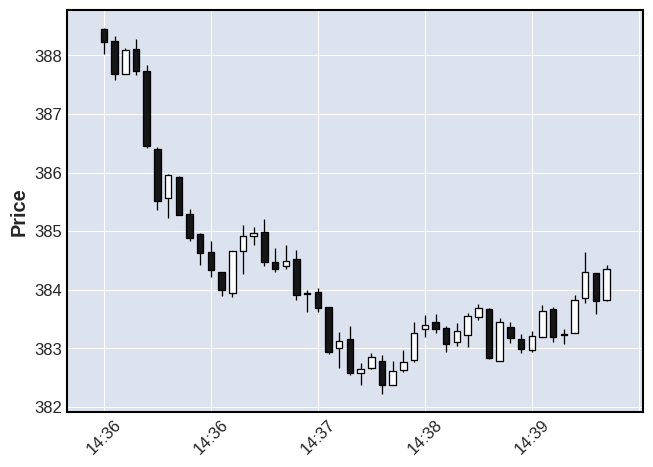

In [ ]:
!pip install mplfinance -q
import mplfinance as mpf

df = spy
df.index = pd.DatetimeIndex(df['date'])

mpf.plot(df['2022-11-02 14:36':'2022-11-02 14:39'],type='candle')



As we can see above, price moved significantly starting at 14:36 (row 61), so we can see the words spoken that led up to this:

In [ ]:
spy[0:]

,date,open,high,low,close,volume,average,barCount,text,percent
0,2022-11-02 14:31:15,387.13,387.17,386.75,386.83,82173.0,386.884,444.0,"Good morning everybody. Happy Monday. Monday,...",-0.077493
1,2022-11-02 14:31:20,386.80,387.00,386.80,386.91,38918.0,386.913,234.0,NaN,0.028438
2,2022-11-02 14:31:25,386.94,386.96,386.55,386.64,48165.0,386.749,232.0,NaN,-0.077531
3,2022-11-02 14:31:30,386.64,386.95,386.59,386.86,30688.0,386.760,190.0,that I should say today and tomorrow. And the...,0.056900
4,2022-11-02 14:31:35,386.91,386.92,386.81,386.87,22270.0,386.862,130.0,"of February, another one down. And then what ...",-0.010338
...,...,...,...,...,...,...,...,...,...,...
617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,got for you on today's session. Thanks for jo...,NaN
618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greatly appreciate it if you hit the thumbs u...,NaN
619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,so you can type it in manually or you can cli...,NaN
620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"video. With that said, everybody, I wish you ...",NaN
